## This notebook is inspired from this paper: *[Application de la loi de Benford au contrôle de qualité des modèles numériques de terrain](https://www.researchgate.net/publication/331580669_Application_de_la_loi_de_Benford_au_controle_de_qualite_des_modeles_numeriques_de_terrain)*

<div>
<img src="img/Simon_Newcomb_.jpg" width=200 height=160 alt="Shrouded" />
    
<img src="img/frank_benford.jpeg" width=200 height=150 alt="Shrouded" />
</div>

**La loi de Benford**, également appelée **loi de Newcomb-Benford**, **loi des nombres anormaux** ou **loi du premier chiffre**, est une observation sur 
la distribution de fréquence des chiffres de tête dans de nombreux ensembles de données numériques de la vie réelle. La loi stipule que 
dans de nombreux ensembles de nombres naturels, le premier chiffre a tendance à être petit. Dans les ensembles qui obéissent à cette 
loi, le chiffre 1 apparaît comme le premier chiffre significatif environ 30 % du temps, tandis que le chiffre 9 apparaît comme le 
premier chiffre significatif moins de 5 % du temps. Si les chiffres étaient distribués uniformément, ils apparaîtraient chacun 
environ 11,1 % du temps. La loi de Benford permet également de prédire la distribution des chiffres de poids fort, des chiffres 
de poids faible, des combinaisons de chiffres, etc.



## Benford’s Law Distribution

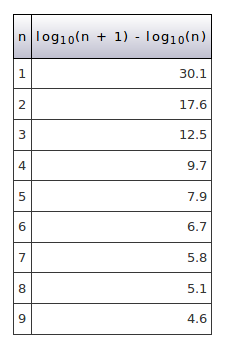

# Study case 0:

In [1]:
# IMPORTING LIBRARIES
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from LNC import *

SyntaxError: non-default argument follows default argument (LNC.py, line 69)

In [ ]:
# Load DEM
dem = rasterio.open('tifs/madeenah.tif')

# Load aspect (slope)
asp = rasterio.open('tifs/madeenah_aspect.tif')

In [ ]:
print("\nDEM\n")
print(dem.profile)
print("\nASPECT\n")
print(asp.profile)

In [ ]:
# reading the first band (not from zero!)
band1 = dem.read(1)

In [ ]:
# Preview of the 
band1

In [ ]:
band1 = band1.flatten()

In [ ]:
f1 = get_dln(band1)

In [ ]:
n = sum(f1)
ff1 = []
for i in range(len(f1)):
    ff1.append(100*f1[i]/n)


In [ ]:
f_lnd(f1)

In [ ]:
# reading the first band (not from zero!)
band2 = asp.read(1) # 2d array

In [ ]:
band2 = band2.flatten()

In [ ]:
f2 = get_dln(band2)

In [ ]:
n2 = sum(f2)
ff2 = []
for i in range(len(f2)):
    ff2.append(100*f2[i]/n2)


In [ ]:
f_lnd(f2)

In [19]:
X = list(range(1,  10))

B = [30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6]

In [35]:
    
def plottingfunc(X, B, ff1, ff2):    
    # Plotting both the curves simultaneously
    plt.figure(figsize=(15, 12))
    plt.plot(X, B, color='r', label='Benford')
    plt.plot(X, ff1, color='g', label='DEM')
    plt.plot(X, ff2, color='b', label='ASPECT')

    # Naming the x-axis, y-axis and the whole graph
    plt.xlabel("Leading Digit", fontsize=20)
    plt.xticks(fontsize = 22)
    plt.ylabel("%", fontsize=20)
    plt.yticks(fontsize = 22)
    plt.title("Leading Digits Distributions", fontsize=28)

    # Adding legend, which helps us recognize the curve according to it's color
    plt.legend(fontsize=18)

    # To load the display window
    plt.show()
    
    return 0

In [41]:
plot_benford(X, B, ff1, ff2)

NameError: name 'plot_benford' is not defined

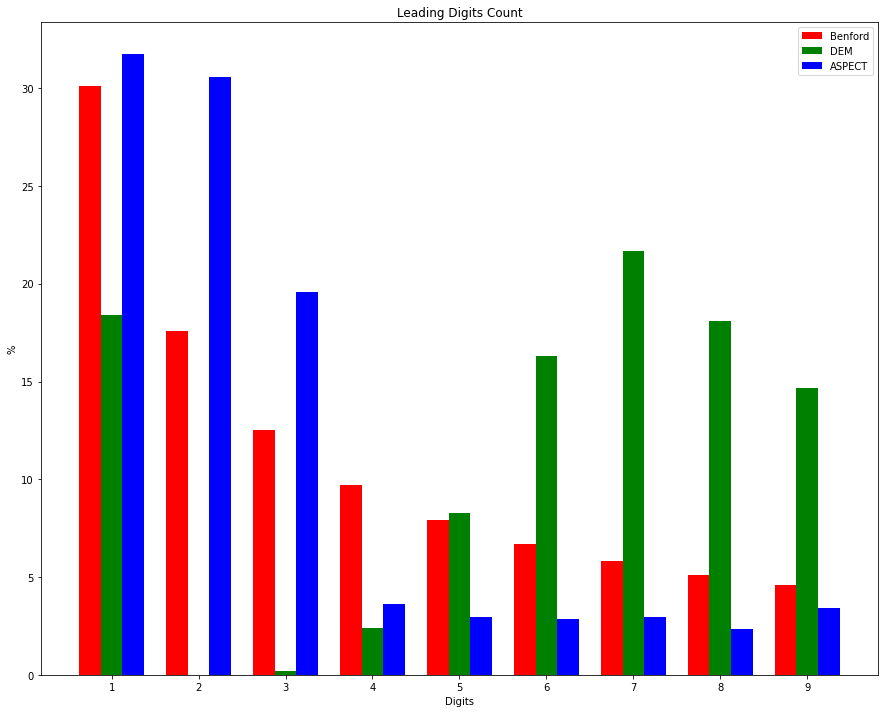

In [19]:
N = 9
ind = np.arange(N) 
width = 0.25

plt.figure(figsize=(15, 12))

bar1 = plt.bar(ind, B, width, color = 'r')

bar2 = plt.bar(ind+width, ff1, width, color='g')
  
bar3 = plt.bar(ind+width*2, ff2, width, color = 'b')
  
plt.xlabel("Digits")
plt.ylabel('%')
plt.title("Leading Digits Count")
  
plt.xticks(ind+width,['1', '2', '3', '4', '5', '6', '7', '8', '9'])
plt.legend( (bar1, bar2, bar3), ('Benford', 'DEM', 'ASPECT') )
plt.show()